# Predicting Happiness Score using LinearRegression

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:/Users/ankus/Downloads/2015.csv")
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
data.shape

(158, 12)

In [4]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
#checking null values
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
#dropping unwanted column
data=data.drop(columns=['Country','Region','Happiness Rank'])
data


,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


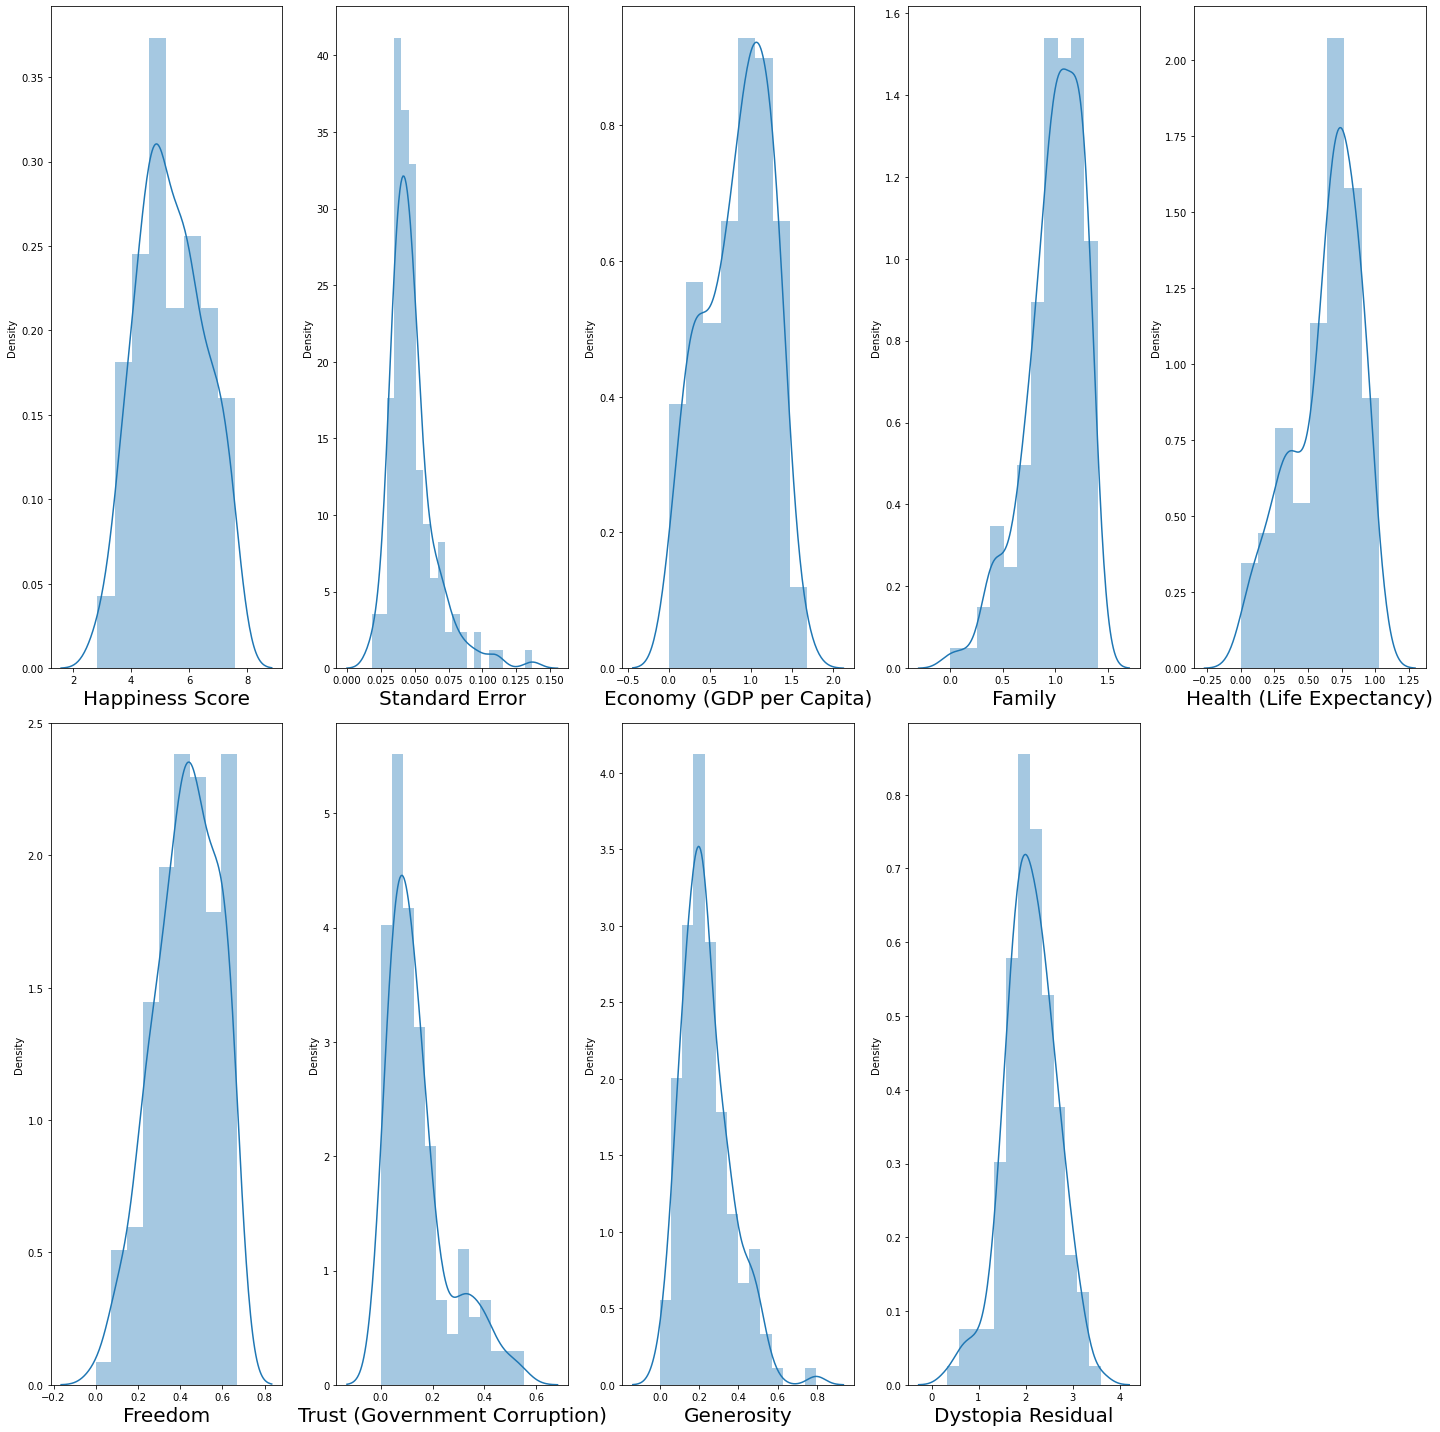

In [7]:
#let's see data distribution
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [8]:
#divide the dataset into features and labels
x=data.drop(columns=['Happiness Score'])
y=data['Happiness Score']

In [9]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [10]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [11]:
#checking skewness
x.skew().sort_values()

Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Economy (GDP per Capita)        -0.317575
Dystopia Residual               -0.238911
Generosity                       1.001961
Trust (Government Corruption)    1.385463
Standard Error                   1.983439
dtype: float64

data looks skewed

In [12]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [13]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.972226,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391,0.750992
1,0.309350,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995,1.110011
2,-1.062017,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973,0.702275
3,-0.503610,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080,0.651035
4,-0.823548,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224,0.625118
...,...,...,...,...,...,...,...,...
153,-0.916014,-1.494046,-0.959885,-0.939459,1.135229,2.012856,0.065304,-2.393259
154,-0.719479,-1.360829,-1.896644,-1.276496,0.307514,-0.433835,-0.334169,-0.863565
155,0.399137,-0.513469,-1.690664,0.262933,-1.668658,0.738915,1.659336,-2.866216
156,1.926902,-1.894954,-1.796803,-1.525700,-1.849903,-0.151946,-0.194829,-0.514801


In [14]:
x.columns

Index(['Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [15]:
#validating that skewness is removed or not
x.skew().sort_values()

Health (Life Expectancy)        -0.183181
Family                          -0.169651
Economy (GDP per Capita)        -0.127233
Freedom                         -0.080728
Standard Error                  -0.020092
Generosity                       0.013320
Dystopia Residual                0.022925
Trust (Government Corruption)    0.185965
dtype: float64

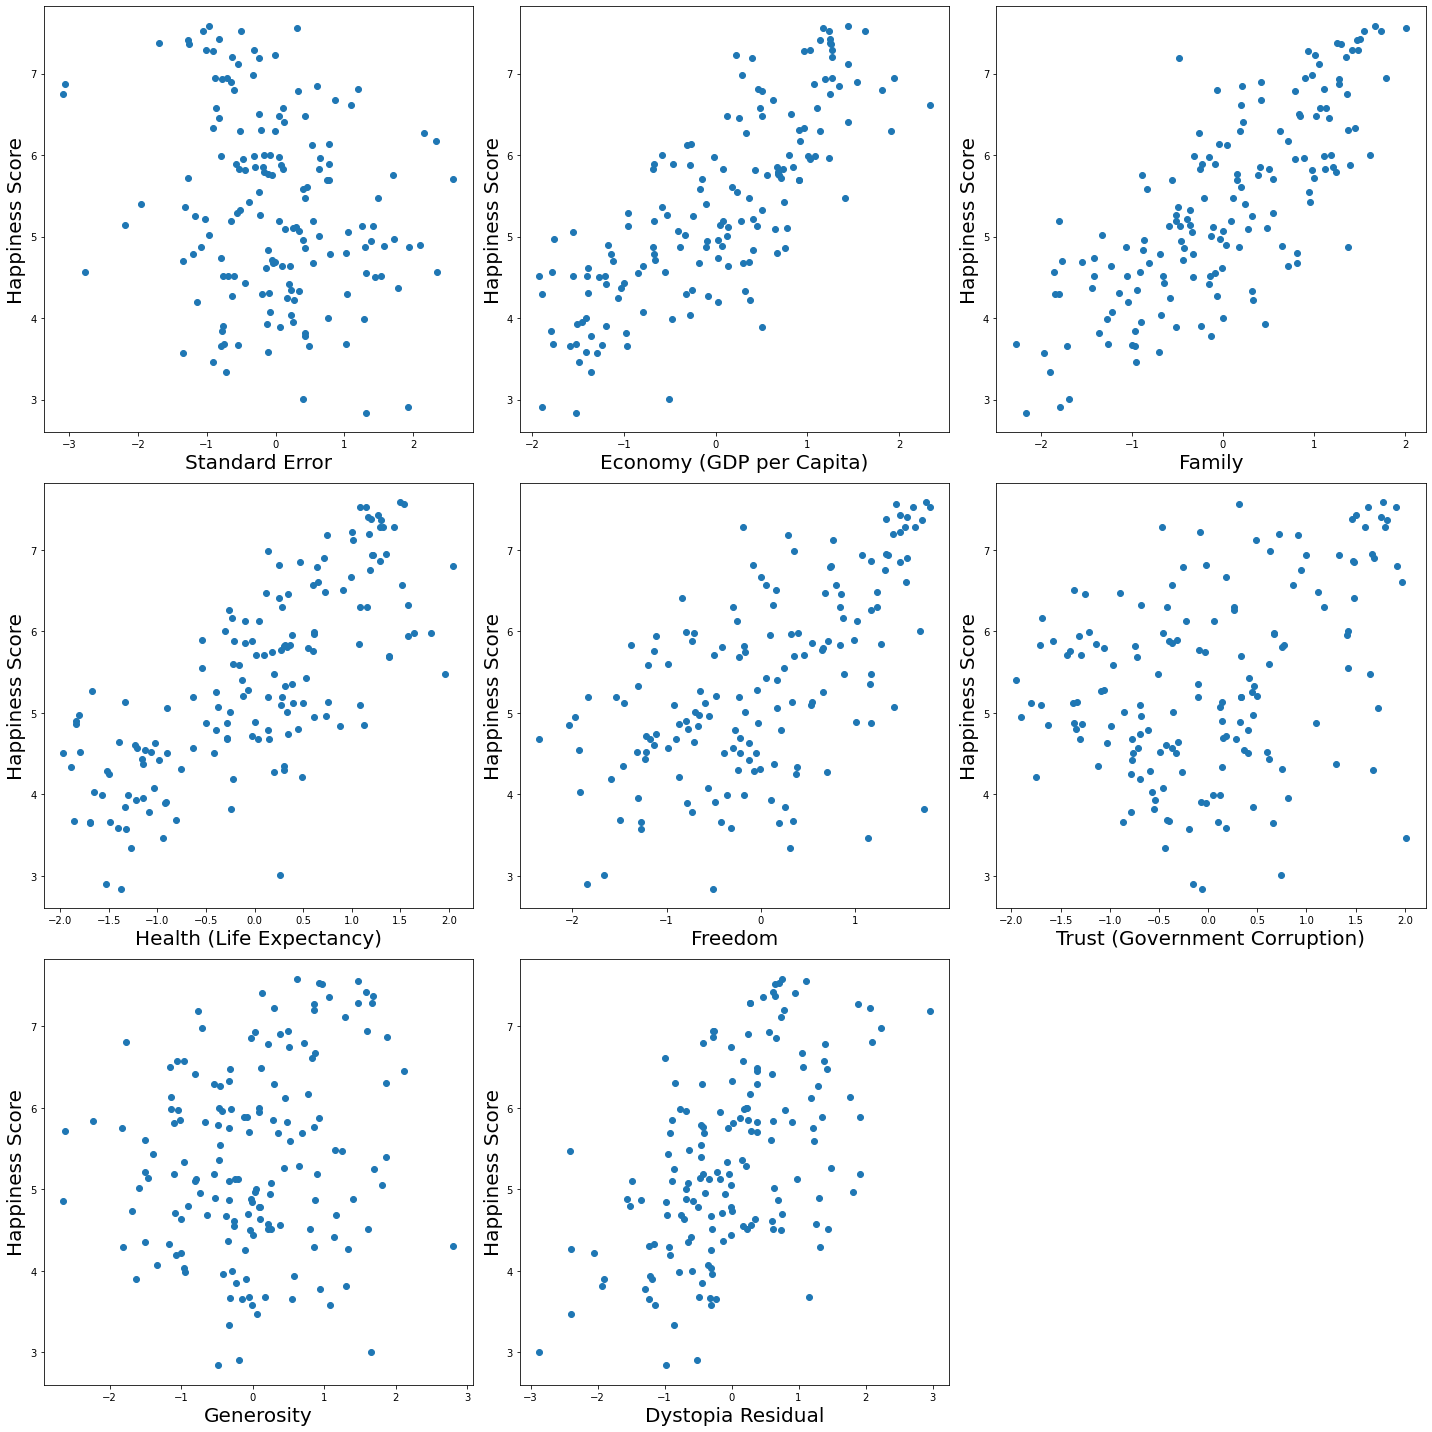

In [16]:
#visualizing relationship between features and labels
plt.figure(figsize=(20,20))
plotnumber=1

for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Happiness Score',fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

In [17]:
#data scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [18]:
x_scaled

array([[-0.9722262 ,  1.44606101,  1.66920633, ...,  1.77399061,
         0.62239051,  0.75099154],
       [ 0.30934969,  1.17332111,  2.01213244, ...,  0.31599326,
         1.48099498,  1.11001108],
       [-1.06201662,  1.23983557,  1.73958573, ...,  1.90679207,
         0.92797276,  0.70227525],
       ...,
       [ 0.39913742, -0.5134688 , -1.69066357, ...,  0.73891461,
         1.65933595, -2.86621557],
       [ 1.92690194, -1.89495386, -1.79680304, ..., -0.15194624,
        -0.19482942, -0.51480136],
       [ 1.31032295, -1.52122584, -2.16039658, ..., -0.06732623,
        -0.49041465, -0.97664547]])

Let's go ahead n and use linear regression and see how good it fit our data but first let's split our data in train and test

# Training Process

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=12)
y_train.head()

33     6.455
64     5.709
15     6.983
101    4.857
62     5.754
Name: Happiness Score, dtype: float64

In [21]:
x_train

array([[-8.19448043e-01,  2.51308915e-01,  1.15979078e+00,
         3.45224931e-01,  8.52573414e-01, -1.25545154e+00,
         2.11265933e+00,  3.74134890e-01],
       [ 2.58627251e+00, -1.51481036e-01,  5.45962058e-01,
         9.67104170e-02,  4.53853323e-01, -1.43598674e+00,
        -5.75866935e-02,  3.75885742e-01],
       [-3.25880634e-01,  2.89106720e-01,  9.78251861e-01,
         1.42283419e-01,  3.51187063e-01,  6.27390377e-01,
        -7.09669095e-01,  2.23676243e+00],
       [ 4.30538441e-01,  7.56136950e-01, -4.28243693e-01,
         1.12934838e+00, -2.03512698e+00, -1.63027771e+00,
        -2.65294481e+00, -5.71353919e-01],
       [ 1.70309567e+00,  6.93842081e-01,  3.86174419e-01,
         1.74760313e-01, -1.67332793e-01, -3.14384645e-02,
        -3.30780351e-01, -5.07444114e-02],
       [-5.42081285e-01,  1.44020854e+00,  1.05778139e+00,
         1.01037000e+00,  7.69856069e-01,  4.84419076e-01,
         1.28944096e+00,  7.37000992e-01],
       [ 7.71679988e-01, -2.659967

In [22]:
y_train

33     6.455
64     5.709
15     6.983
101    4.857
62     5.754
       ...  
3      7.522
130    4.292
134    4.194
155    3.006
75     5.332
Name: Happiness Score, Length: 118, dtype: float64

In [23]:
x_test

array([[ 0.25140542,  0.77231256,  0.48768517,  1.0884508 ,  0.53053568,
        -1.70176328, -0.80234618, -1.48040107],
       [-0.59825003, -1.55737966, -1.41694467, -0.89939076, -0.04603201,
         0.40525507,  0.20862212,  0.61938538],
       [-0.7949485 ,  1.08320593,  1.11447273,  1.81364264,  0.392716  ,
         0.67182114, -1.14740722, -0.77533415],
       [-0.12070731, -1.51649125,  0.45626929, -1.22051509,  0.11254602,
        -0.54490853,  0.57782785, -1.21204678],
       [ 0.05607654,  0.50380984,  0.84731333,  0.72814773,  1.23025518,
         1.11547544,  0.1177129 ,  0.37784391],
       [-0.59825003,  1.81808901, -0.06266861,  2.04474183,  0.74258947,
         1.92182721,  0.72374324, -0.4224226 ],
       [-0.91601433, -1.49404642, -0.95988496, -0.93945944,  1.13522912,
         2.01285642,  0.06530356, -2.39325861],
       [ 0.06223853,  0.49997887, -0.51806109, -0.9224534 , -0.78853989,
        -0.02317021, -1.63845742, -1.90172156],
       [ 0.13284046,  0.64360058

In [24]:
y_test

87     5.102
121    4.512
45     5.987
140    3.931
31     6.485
23     6.798
153    3.465
142    3.896
88     5.098
111    4.677
86     5.123
78     5.253
149    3.656
40     6.168
108    4.694
85     5.124
16     6.946
21     6.853
131    4.271
81     5.192
39     6.269
95     4.949
66     5.689
38     6.295
5      7.406
6      7.378
61     5.759
1      7.561
148    3.667
93     4.971
63     5.716
11     7.226
24     6.786
71     5.474
113    4.633
83     5.140
152    3.575
17     6.940
80     5.194
129    4.297
Name: Happiness Score, dtype: float64

In [25]:
x_train.shape

(118, 8)

In [26]:
y_train.shape

(118,)

In [27]:
x_test.shape

(40, 8)

In [28]:
y_test.shape

(40,)

# MODEL INSTANTIATING AND TRAINING

In [29]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [30]:
#predict the happiness score given features

In [31]:
data

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [32]:
#predicting happiness score for first data
print('Happiness Score is:', regression.predict(scaler.transform([[0.03,1.39,1.34,0.94,0.66,0.41,0.29,2.51]])))

Happiness Score is: [8.04782642]


In [33]:
#saving the model to the local file system

import pickle
filename='finalized_model.pickle'
pickle.dump(regression,open(filename,'wb'))

In [34]:
#predicting using the save model
loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict(scaler.transform([[0.06,0.20,0.13,0.28,0.36,0.10,0.16,1.56]]))
print('Happiness Score is:',a)

Happiness Score is: [6.47297344]


In [35]:
#Adjusted r2 score
regression.score(x_train,y_train)*100

99.152974844764

In [36]:
#let's check how well model fits the test data
regression.score(x_test,y_test)*100

99.31731736265726

# let's plot and visualize

In [37]:
y_pred=regression.predict(x_test)

In [38]:
y_pred

array([5.134813  , 4.51327944, 6.16090559, 3.97505675, 6.48728459,
       6.75268955, 3.3427927 , 3.87992552, 5.08760916, 4.70454916,
       5.06396855, 5.14030907, 3.77504633, 6.07866957, 4.73817425,
       4.99989991, 7.00537146, 6.77723225, 4.32878485, 5.11013575,
       6.17229388, 4.90477945, 5.70013468, 6.3114473 , 7.44123958,
       7.39760741, 5.65474746, 7.79436365, 3.70792315, 5.11247763,
       5.60644722, 7.33334661, 6.81559543, 5.64834389, 4.54023426,
       5.02568443, 3.7501676 , 7.05659801, 5.31602456, 4.22293148])

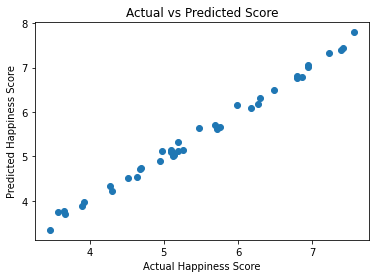

In [39]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Predicted Score')
plt.show()

# MODEL EVALUATION

In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [41]:
y_pred=regression.predict(x_test)

In [42]:
mean_absolute_error(y_test,y_pred)

0.078954618163168

In [43]:
mean_squared_error(y_test,y_pred)


0.009196167877530467

In [44]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.0958966520663285

Let's check if our model is overfitting our training data

# Cross Validation

In [45]:
#LASSO REGULARIZATION
#LASSOCV will return best aplha max iteration
#Normalize is subtracting the mean and dividing ny the L2-norm
from sklearn.linear_model import LassoCV, Lasso
lasscv=LassoCV(alphas=None, max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [46]:
#best alpha parameter
alpha=lasscv.alpha_
alpha

0.00044203885679124305

In [47]:
#now that we have best parameter,let's use Lasso regression and see how well our data has filter before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00044203885679124305)

In [48]:
lasso_reg.score(x_test,y_test)*100

99.32268631995159

In [49]:
#RIDGE REGULARIZATION
#RidgeCV will return best alpha and coefficients after performing 10 cross validation

from sklearn.linear_model import RidgeCV,Ridge
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)

ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [50]:
ridgecv.alpha_

0.001

In [51]:
ridge_model=Ridge(alpha=0.001)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [52]:
ridge_model.score(x_test,y_test)*100

99.31733239434703

we got around same r2 square using LASSO and Ridge regression as well .So it is safe to say that there is no overfitting


# Complete!